<h1 style="font-size:36px; font-style:italic;">Data Visualization</h1>


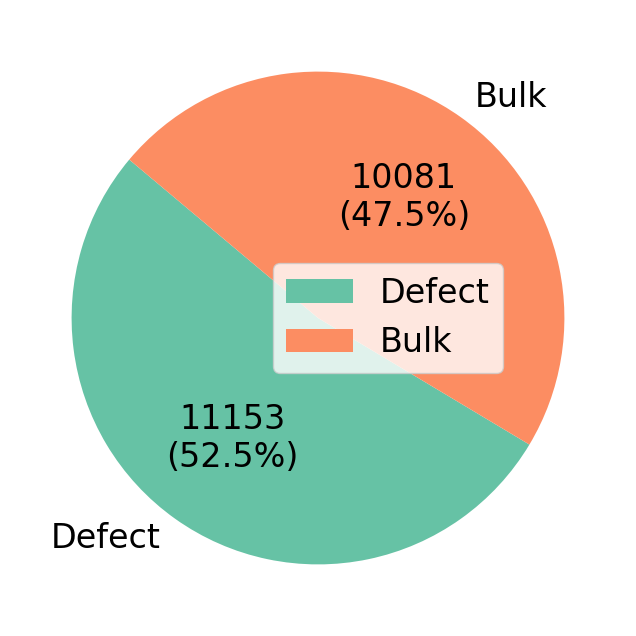

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_url = 'https://raw.githubusercontent.com/msehabibur/defect_GNN_gen_1/main/Codes/id_prop.csv'


data_no_header = pd.read_csv(file_url, header=None, on_bad_lines='skip')


data_no_header.columns = ['Filename', 'Property Value']


data_no_header['Category'] = data_no_header['Filename'].apply(lambda x: 'Bulk' if 'bulk' in x else 'Defect')

category_counts = data_no_header['Category'].value_counts()


colors = ['#66c2a5', '#fc8d62']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}\n({pct:.1f}%)'
    return my_format

plt.figure(figsize=(10, 8))
category_counts.plot(kind='pie',
                     autopct=autopct_format(category_counts),
                     startangle=140,
                     colors=colors,
                     fontsize=24,
                     textprops={'color': 'black', 'fontsize': 18},
                     labeldistance=1.1)

plt.legend(labels=category_counts.index,
           loc="center left",
           bbox_to_anchor=(0.40, 0.5),
           fontsize=24,
           frameon=True)

plt.ylabel('')
plt.savefig('1.png')
plt.show()


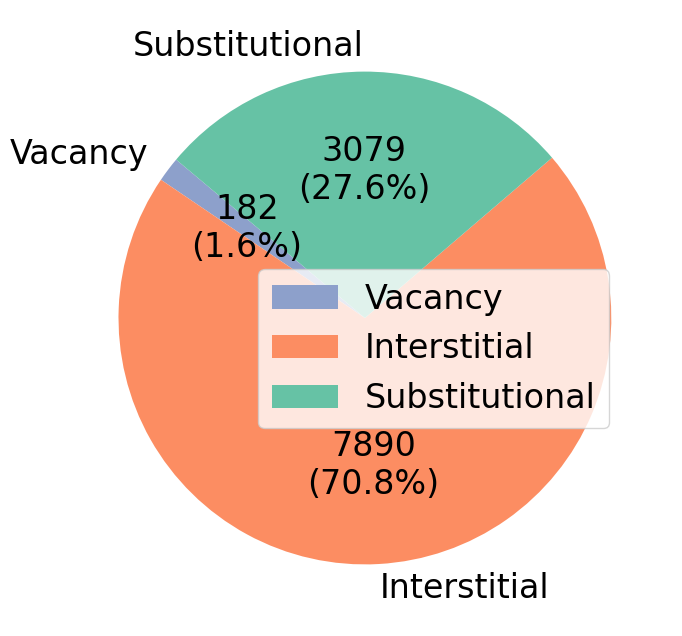

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_url = 'https://raw.githubusercontent.com/msehabibur/defect_GNN_gen_1/main/Codes/id_prop.csv'

defect_data = pd.read_csv(file_url, header=None)

defect_data.columns = ['Defect Identifier', 'Property Value']


filtered_defect_data = defect_data[~defect_data['Defect Identifier'].str.contains('bulk_')]


vacancy_data = filtered_defect_data[filtered_defect_data['Defect Identifier'].str.contains('V_')]
interstitial_data = filtered_defect_data[filtered_defect_data['Defect Identifier'].str.contains('_i_')]
substitutional_data = filtered_defect_data[~filtered_defect_data['Defect Identifier'].str.contains('V_') &
                                           ~filtered_defect_data['Defect Identifier'].str.contains('_i_')]


filtered_defect_counts = {
    'Vacancy': len(vacancy_data),
    'Interstitial': len(interstitial_data),
    'Substitutional': len(substitutional_data)
}


colors = ['#8da0cb', '#fc8d62', '#66c2a5']

plt.figure(figsize=(10, 8))
plt.pie(filtered_defect_counts.values(),
        labels=filtered_defect_counts.keys(),
        autopct=lambda pct: f'{int(pct * sum(filtered_defect_counts.values()) / 100)}\n({pct:.1f}%)',
        startangle=140,
        colors=colors,
        textprops={'color': 'black', 'fontsize': 24},
        labeldistance=1.1)


plt.legend(labels=filtered_defect_counts.keys(),
           loc="center left",
           bbox_to_anchor=(0.30, 0.45),
           fontsize=24,
           frameon=True)

plt.ylabel('')
plt.savefig('2.png')
plt.show()


Counts of Native and Extrinsic defects:
{'Native': 1164, 'Extrinsic': 9989}


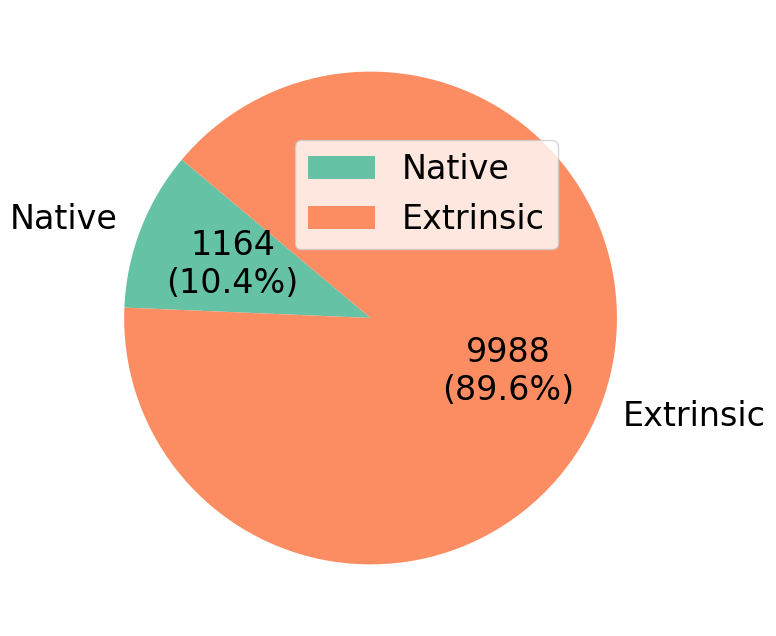

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_url = 'https://raw.githubusercontent.com/msehabibur/defect_GNN_gen_1/main/Codes/id_prop.csv'


defect_data = pd.read_csv(file_url, header=None)


defect_data.columns = ['Defect Identifier', 'Property Value']


filtered_defect_data = defect_data[~defect_data['Defect Identifier'].str.contains('bulk_')]

extrinsic_data = filtered_defect_data[
    filtered_defect_data['Defect Identifier'].str.contains('M_i|M_A|M_B')
]


native_data = filtered_defect_data[
    ~filtered_defect_data['Defect Identifier'].str.contains('M_i|M_A|M_B')
]


native_extrinsic_counts = {
    'Native': len(native_data),
    'Extrinsic': len(extrinsic_data)
}

print("Counts of Native and Extrinsic defects:")
print(native_extrinsic_counts)

plt.figure(figsize=(10, 8))
plt.pie(native_extrinsic_counts.values(),
        labels=native_extrinsic_counts.keys(),
        autopct=lambda pct: f'{int(pct * sum(native_extrinsic_counts.values()) / 100)}\n({pct:.1f}%)',
        startangle=140,
        colors=['#66c2a5', '#fc8d62'],
        textprops={'color': 'black', 'fontsize': 24},
        labeldistance=1.1)

plt.legend(labels=native_extrinsic_counts.keys(),
           loc="center left",
           bbox_to_anchor=(0.35, 0.7),
           fontsize=24,
           frameon=True)

plt.ylabel('')
plt.savefig('3.png')
plt.show()


<ipython-input-6-71873ad5d8a0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y='formation_energy_meV', data=data_no_header_new, inner='box', linewidth=1.5, palette=colors)


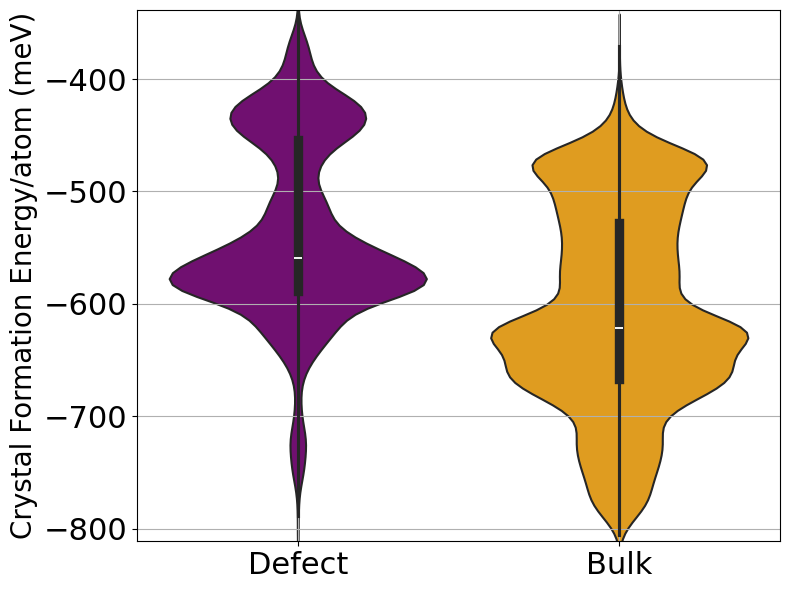

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_url = 'https://raw.githubusercontent.com/msehabibur/defect_GNN_gen_1/main/Codes/id_prop.csv'

data_no_header_new = pd.read_csv(file_url, header=None)

data_no_header_new.columns = ['id', 'formation_energy']

data_no_header_new['formation_energy_meV'] = data_no_header_new['formation_energy'] * 1000

data_no_header_new['type'] = data_no_header_new['id'].apply(lambda x: 'Bulk' if 'bulk' in x else 'Defect')

colors = ['purple', 'orange']

plt.figure(figsize=(8, 6))
sns.violinplot(x='type', y='formation_energy_meV', data=data_no_header_new, inner='box', linewidth=1.5, palette=colors)
sns.set_style("whitegrid")

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.ylabel('Crystal Formation Energy/atom (meV)', fontsize=20)
plt.xlabel('', fontsize=16)
plt.ylim([data_no_header_new['formation_energy_meV'].min(), data_no_header_new['formation_energy_meV'].max()])
plt.grid(True)
plt.tight_layout()

plt.savefig('violin_plot_bulk_defect_new.png', bbox_inches='tight')
plt.savefig('1.png', bbox_inches='tight', dpi=450)
plt.show()


<h1 style="font-size:36px; font-style:italic;">Let's make the parity plot bteween DFT and ALIGNN prediction</h1>


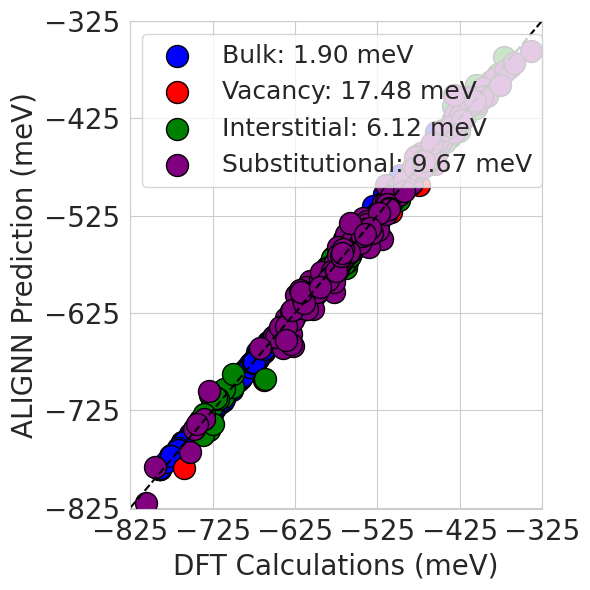

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

file_url = 'https://raw.githubusercontent.com/msehabibur/defect_GNN_gen_1/main/Codes/prediction_results_test_set.csv'


data_new = pd.read_csv(file_url)


data_new['target_meV'] = data_new['target'] * 1000
data_new['prediction_meV'] = data_new['prediction'] * 1000

data_filtered = data_new[np.abs(data_new['target_meV'] - data_new['prediction_meV']) <= 50]


bulk_data = data_filtered[data_filtered['id'].str.contains('bulk')]
defect_data = data_filtered[~data_filtered['id'].str.contains('bulk')]

vacancy_data = defect_data[defect_data['id'].str.contains('V_')]
interstitial_data = defect_data[defect_data['id'].str.contains('_i_')]
substitutional_data = defect_data[~defect_data['id'].str.contains('V_') & ~defect_data['id'].str.contains('_i_')]


bulk_rmse = np.sqrt(mean_squared_error(bulk_data['target_meV'], bulk_data['prediction_meV']))
vacancy_rmse = np.sqrt(mean_squared_error(vacancy_data['target_meV'], vacancy_data['prediction_meV']))
interstitial_rmse = np.sqrt(mean_squared_error(interstitial_data['target_meV'], interstitial_data['prediction_meV']))
substitutional_rmse = np.sqrt(mean_squared_error(substitutional_data['target_meV'], substitutional_data['prediction_meV']))

plt.figure(figsize=(6, 6))


plt.scatter(bulk_data['target_meV'], bulk_data['prediction_meV'], color='blue', alpha=1, edgecolor='black', s=250, marker='o', label=f'Bulk: {bulk_rmse:.2f} meV')


plt.scatter(vacancy_data['target_meV'], vacancy_data['prediction_meV'], color='red', alpha=1, edgecolor='black', s=250, marker='o', label=f'Vacancy: {vacancy_rmse:.2f} meV')
plt.scatter(interstitial_data['target_meV'], interstitial_data['prediction_meV'], color='green', alpha=1, edgecolor='black', s=250, marker='o', label=f'Interstitial: {interstitial_rmse:.2f} meV')
plt.scatter(substitutional_data['target_meV'], substitutional_data['prediction_meV'], color='purple', alpha=1, edgecolor='black', s=250, marker='o', label=f'Substitutional: {substitutional_rmse:.2f} meV')


plt.plot([-825, -325], [-825, -325], color='black', linestyle='--')


plt.xlim(-826, -325)
plt.ylim(-826, -325)


plt.xticks(np.arange(-825, -324, 100), fontsize=20, fontname='sans-serif')
plt.yticks(np.arange(-825, -324, 100), fontsize=20, fontname='sans-serif')


plt.xlabel('DFT Calculations (meV)', fontsize=20, fontname='sans-serif')
plt.ylabel('ALIGNN Prediction (meV)', fontsize=20, fontname='sans-serif')
plt.legend(loc='upper left', prop={'family':'sans-serif', 'size':18})

plt.grid(True)
plt.minorticks_on()


plt.tight_layout()
plt.savefig('1.png', bbox_inches='tight', dpi=450)
plt.show()


<h1 style="font-size:36px; font-style:italic;">Let's optimize a defect (N_i+N_i in ZnTe) using the trained ALIGNN model</h1>


In [ ]:
! pip install pymatgen
! pip install alignn
! pip install  dgl -f https://data.dgl.ai/wheels/torch-2.1/cu121/repo.html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.9/109.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 k

Looking in links: https://data.dgl.ai/wheels/torch-2.1/cu121/repo.html


In [ ]:
import argparse
import os
import shutil
import sys
import time
import random

import numpy as np
import torch
import torch.nn as nn
from sklearn import metrics
from torch.autograd import Variable
from torch.utils.data import DataLoader

from pymatgen.core import Structure, Lattice, PeriodicSite
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.local_env import CrystalNN

import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import hyperopt as hy
from jarvis.core.atoms import Atoms
from jarvis.core.graphs import Graph
from alignn.models.alignn import ALIGNN
from jarvis.analysis.structure.spacegroup import Spacegroup3D

class DefectOptimization:
    def __init__(self):
        self.algo_step = 0
        self.structure_num = 0
        os.makedirs('results_anneal/cif_files', exist_ok=True)
        with open(os.path.join('results_anneal', 'energy_data.csv'), 'w+') as f:
            f.writelines("step, energy,time\n")

        self.start_time = time.time()
        self.structure = Structure.from_file("POSCAR.cif")
        self.cd_sites = [site for site in self.structure if site.species_string == "Cd"]
        #self.zn_sites = [site for site in self.structure if site.species_string == "Zn"]
        self.te_sites = [site for site in self.structure if site.species_string == "Te"]
        self.as_sites = [site for site in self.structure if site.species_string == "As"]
        self.cl_sites = [site for site in self.structure if site.species_string == "Cl"]
        self.vacancy_site = random.choice(self.as_sites)
        self.vacancy_index = self.as_sites.index(self.vacancy_site)
        self.nn_algorithm = CrystalNN(weighted_cn=True, distance_cutoffs=None)
        self.nearest_neighbours = self.nn_algorithm.get_nn_info(self.structure, self.vacancy_index)

        self.optimization_algo(200, 600, 100, algorithm='anneal')

    def create_structure(self, kwargs):
        distorted_structure = self.structure.copy()
        dict_vals = {}
        self.structure_num += 1

        for i in range(len(self.nearest_neighbours)):
            dict_vals[i] = [
                float(kwargs[f'x{i}']),
                float(kwargs[f'y{i}']),
                float(kwargs[f'z{i}'])
            ]

        step = 0
        for neighbor in self.nearest_neighbours:
            new_fractional_coords = Lattice(distorted_structure.lattice.matrix).get_fractional_coords(dict_vals[step])
            new_site = PeriodicSite(neighbor['site'].species, new_fractional_coords, distorted_structure.lattice)
            distorted_structure = Structure.from_sites([new_site if idx == neighbor['site_index'] else site for idx, site in enumerate(distorted_structure)])
            step += 1

        new_cif_file = f"results_anneal/cif_files/predict{self.structure_num}.cif"
        writer = CifWriter(distorted_structure)
        writer.write_file(new_cif_file)
        with open(os.path.join('results_anneal/cif_files', 'id_prop.csv'), 'w+') as f:
            f.writelines(f"predict{self.structure_num}, {0}")

    def predict_formation_energy(self, kwargs):
        self.algo_step += 1
        self.create_structure(kwargs)
        cifpath = 'results_anneal/cif_files'
        results = f'results_anneal/results{self.algo_step}'
        device = "cpu"
        model = ALIGNN()
        model.load_state_dict(torch.load("checkpoint_80.pt")["model"])
        model.to(device)
        model.eval()

        def predict_energy(cif_file):
            atoms = Atoms.from_cif(cif_file)
            cvn = Spacegroup3D(atoms).conventional_standard_structure

            g, lg = Graph.atom_dgl_multigraph(atoms)
            out_data = (
                model([g.to(device), lg.to(device)])
                .detach()
                .cpu()
                .numpy()
                .flatten()
                .tolist()[0]
            )
            return out_data

        energy = predict_energy(f'results_anneal/cif_files/predict{self.structure_num}.cif')
        dict_final = {'loss': energy, 'status': 'ok'}

        with open(os.path.join('results_anneal', 'energy_data.csv'), 'a+') as f:
            f.write(','.join([str(self.algo_step),
                              str(energy),
                              str(time.time() - self.start_time)]) + '\n')

        return dict_final

    def optimization_algo(self, n_init, max_step, rand_seed, algorithm="bayesian"):
        pbounds = {}

        for i in range(len(self.nearest_neighbours)):
            pbounds[f'x{i}'] = hy.hp.uniform(f'x{i}', self.nearest_neighbours[i]['site'].coords[0] - 0.2, self.nearest_neighbours[i]['site'].coords[0] + 0.2)
            pbounds[f'y{i}'] = hy.hp.uniform(f'y{i}', self.nearest_neighbours[i]['site'].coords[1] - 0.2, self.nearest_neighbours[i]['site'].coords[1] + 0.2)
            pbounds[f'z{i}'] = hy.hp.uniform(f'z{i}', self.nearest_neighbours[i]['site'].coords[2] - 0.2, self.nearest_neighbours[i]['site'].coords[2] + 0.2)

        if algorithm == 'rand':
            print('using Random Search ...')
            algo = hy.rand.suggest
        elif algorithm == 'anneal':
            print('using Simulated Annealing ...')
            algo = hy.partial(hy.anneal.suggest)
        elif algorithm == 'bayesian':
            print('using Bayesian Optimization ...')
            algo = hy.partial(hy.tpe.suggest, n_startup_jobs=n_init)
        else:
            print("Invalid Algorithm")

        if rand_seed == -1:
            rand_seed = None
        else:
            rand_seed = np.random.default_rng(rand_seed)

        trials = hy.Trials()
        best = hy.fmin(fn=self.predict_formation_energy,
                       space=pbounds,
                       algo=algo,
                       max_evals=max_step,
                       trials=trials,
                       rstate=rand_seed)
        print(best)

if __name__ == "__main__":
    optimizer = DefectOptimization()

using Simulated Annealing ...
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index

FileNotFoundError: [Errno 2] No such file or directory: 'energy_data.csv'

<h1 style="font-size:36px; font-style:italic;">Let's plot the energy vs. optimization step</h1>

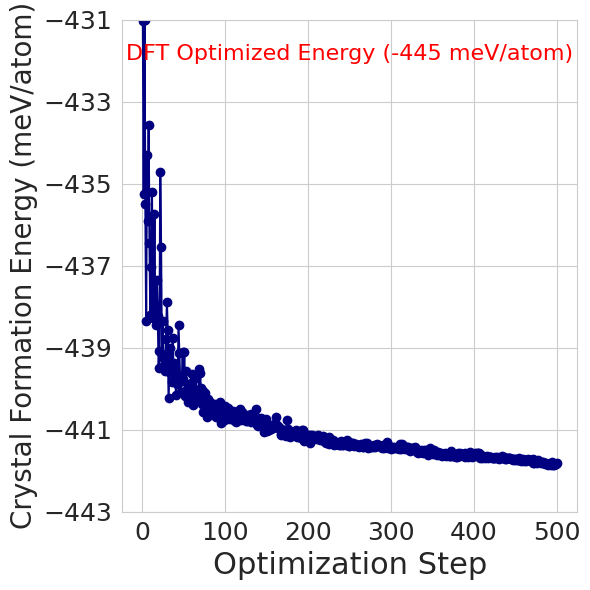

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Arial Narrow'


file_path = 'https://raw.githubusercontent.com/msehabibur/defect_GNN_gen_1/main/Codes/Data/energy_data.csv'
data = pd.read_csv(file_path)

filtered_data = data[data['step'] <= 500].copy()

filtered_data['energy_meV'] = filtered_data['energy'] * 1000

plt.figure(figsize=(6, 6))

plt.plot(filtered_data['step'], filtered_data['energy_meV'], marker='o', linestyle='-', color='navy', label='Energy Data')
plt.xlabel('Optimization Step', fontsize=22)
plt.ylabel('Crystal Formation Energy (meV/atom)', fontsize=20)

plt.xticks(np.arange(0, filtered_data['step'].max() + 100, 100), fontsize=18)

plt.ylim(-443, -431)
plt.yticks(np.arange(-443, -431 + 2, 2), fontsize=18)

plt.axhline(y=-445, color='red', linestyle='--', linewidth=2)

plt.text(0.5, 0.95, 'DFT Optimized Energy (-445 meV/atom)', color='red', fontsize=16,
         horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes,
         fontdict={'family': 'Arial Narrow'})

plt.grid(True)
plt.tight_layout()

plt.savefig('energy_vs_optimization_step_adjusted_range.png', bbox_inches='tight', dpi=450)
plt.show()
